# Plotting in Python: an Overview

There are many ways to create graphs, not all of them based on Matplotlib (though many are). Because they don't always play nicely together within a single notebook, this will just be a high-level summary with links to other notebooks to explore the details.

In an attempt to make sense of an increasingly complex set of choices, I have attempted to divide the list into various use cases. This is a simplification: some packages already straddle multiple sections, and this will become more true as the newer ones evolve and grow.

To give a sense of the range of visulaization options in Python, Jake VanderPlas greated this graphic for PyCon 2017. Things are unlikely to have become simpler since then, though bear in mind that the list is broader than just plotting programs that put points on axes.
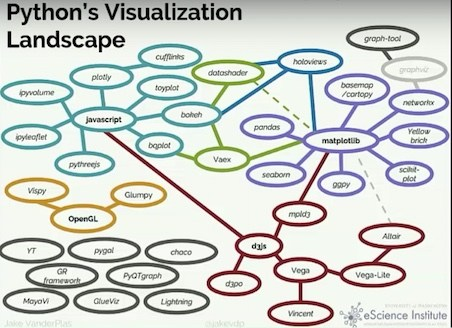
The talk is on YouTube: https://www.youtube.com/watch?v=FytuB8nFHPQ

## General-Purpose Plotting

You know what needs plotting and want something versatile, stable, familar, and already installed on your computer. For Python programmers there is one very obvious choice.

### _Matplotlib_

The oldest Python graphing package, and still under very active development. It tries to be all things to all people and is more successful than we could reasonably expect. However, this comes at the cost of some complexity (two different APIs!) and even experienced users can get frustrated. But there is always a way (or more likely several ways) to get the job done. And there is LOTS of documentation; you'll miss that when you try to use some of the newer packages.

More details in [2_Matplotlib.ipynb](2_Matplotlib.ipynb)

## Exploratory Data Science

You have wide dataframes with many fields, and want to understand relationships between them. This means quickly trying a variety of plot types with multiple fields encoded in each.

### _Seaborn_

Built on top of Matplotlib, this mostly aims to be much better at supporting and analyzing pandas data structures, which weren't invented until years later than Matplotlib. To quote [the Seaborn website](https://seaborn.pydata.org/introduction.html):

"Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots."

Because Seaborn starts by overwriting many of Matplotlib's default settings (the rcParam system), mixing them in the same notebook is asking for trouble.

Like matplotlib, plots are static. On the plus side, it tends to choose sensible defaults and need shorter, simpler code than the interactive packages. More details in [Seaborn.ipynb](Seaborn.ipynb)

### _Altair_

Built on top of Vega-Lite, this is "a declarative statistical visualization library for Python". Using it with JupyterLab is recommended but Jupyter notebooks are also supported. Data is in Pandas dataframes. https://altair-viz.github.io/index.html

Altair is relatively new and evolving rapidly, which can be both a strength and a weakness. Well worth watching, whether or not you use it immediately. More details in [Altair.ipynb](Altair.ipynb)

### _plotnine_

Inspired by ggplot2 (as used and much-loved by R programmers) and by the grammar of graphics. Plotnine seems to be under active development, unlike the `ggplot` package which was conceptually similar.

## Interactive graphics

You have complicated data and want to let people explore it through a web interface (including but not limited to Jupyter). Money may change hads afterwards (customers, investors, funding agencies...) so it also needs to look professional. Developments in browser scripting frameworks over the last few years mean that this is quite a growth area.

### _Bokeh_

The open-source framework. Pan/zoom/save are enabled by default, and many other interactions can be added by the programmer. Display is JS-based and always in a browser, but not necessarily Jupyter. https://bokeh.pydata.org/en/latest/

More details in [Bokeh.ipynb](Bokeh.ipynb)

### _Plotly_

This is from a commercial organization whose main business is public websites and data analytics, but they have made their core libraries and Python API open source. https://plot.ly/python/getting-started/

More details in [Plotly.ipynb](Plotly.ipynb)

## Displaying many points

You have tall datasets with many records (millions?). Plotting these in Matplotlib will lock up your computer for a long time before showing an undifferentiated blob with all the markers overlapping. Better approaches either use hardware acceleration (OpenGL) or forget about individual points and plot densities instead.

### _VisPy_

Focused on dynamic display of very large datasets and closely integrated with OpenGL for speed: "designed to be fast, scalable, and easy to use". http://vispy.org/

VisPy certainly isn't a drop-in replacement for Matplotlib. The installation isntructions are clear up front that it "requires at least one toolkit for opening a window and creates an OpenGL context. This can be done using one of Qt, GLFW, SDL2, Wx, or Pyglet. You can also use a Jupyter notebook (version 3+) with WebGL for some visualizations although ___it is not fully functional at this time___" (my emphasis).

My experience: VisPy was easy to install on some computers, painful on others. Qt5 as a backend reliably caused segfaults, Qt4 sometimes confuses conda, wxpython is a decent fallback. The demos in GitHub are impressive (try galaxy.py), but run them from the command line. At this early stage the package is only for people comfortable with OpenGL.

___Glumpy___ is the sister project of VisPy. It is lower-level and definitely incompatible with Jupyter notebooks. 

### _mpl-scatter-density_

A relatively small package on top of Matplotlib. It is designed to be fast when working with large numbers of points ($10^7$ or more, depending how much RAM you throw at it). It shows density maps rather than individual points. https://github.com/astrofrog/mpl-scatter-density

Much simpler than VisPy, this seems to work fine in Jupyter notebooks. More details in [mpl_scatter_density.ipynb](mpl_scatter_density.ipynb)

## Plots with sky images

You have telescope data and want it in a plot annotated with axes, labels, title, etc. Other astronomers understand your need!

### _APLpy_

This is built on top of Matplotlib, but is a specialized astronomical package for display of imaging data in FITS format. https://aplpy.readthedocs.io/en/stable/index.html

Emphasizes production of publication-quality plots in a variety of formats. More details in [APLpy.ipynb](9_APLpy.ipynb)

## Associated Technologies: Graphics

Modern browser scripting must be done in JavaScript (or a variant such as ES7 or TypeScript): non-negotiable. Python programmers need some sort of JS framework running in the background to translate our code into something the browser can understand. Jupyter will do this for embedded Matplotlib and for IPython widgets, but other software may provide useful extra capabilities. 

### _Vega and Vega-Lite_

JS-based plotting packages. Altair is essentially a Python front-end to Vega-Lite. https://vega.github.io/

### _D3_

Described as "a JavaScript library for manipulating documents based on data", D3 seems to have a reputation for being impressive and highly capable but verbose and with a steep learning curve. Plotly is one package that relies on it. https://d3js.org/

### _mpld3_

Converts any script generating a Matplotlib graphic into D3 format. http://mpld3.github.io/index.html

## Associated Technologies: Speed

This was touched on in the Displaying many Points section above. 

### _Datashader_   

Combines code to summarize many points, rather like mpl-scatter-density, with various forms of speed optimization. Said to combine well with Bokeh. https://github.com/pyviz/datashader. A blog post maybe gives a clearer overview than the official website" https://towardsdatascience.com/large-scale-visualizations-and-mapping-with-datashader-d465f5c47fb5

### _OpenGL_

Take control of your graphics card directly for the ultimate speed-up. Great if you can do it, but nobody said it was easy: this is a long way from Python programming. In the browser, WebGL is a closely related technology.

## A note on the data source

The same dataset is used throughout the plotting examples, showing SDSS magnitudes for a set of galaxies and quasars with 5 filters. The code for this is listed below. Note that a much larger dataset is cut down to only 1000 records for demonstration purposes, meaning it is only 80 kB on disk and quick to plot.

```
import numpy as np
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
data = data[::50]  # truncate for plotting
np.save('sdss_colors.npy', data)
```